In [232]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [233]:
data=pd.read_csv('/Users/digitcrom/Desktop/az_cl/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [234]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [235]:
data.drop('CustomerID',axis=1,inplace=True)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


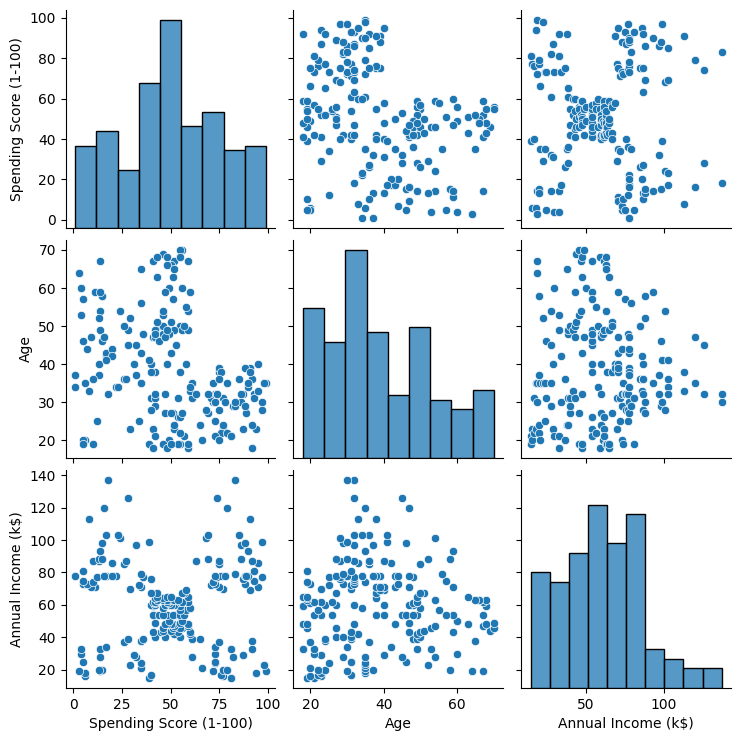

In [249]:
sns.pairplot(data[['Spending Score (1-100)', 'Age', 'Annual Income (k$)']])
plt.show()

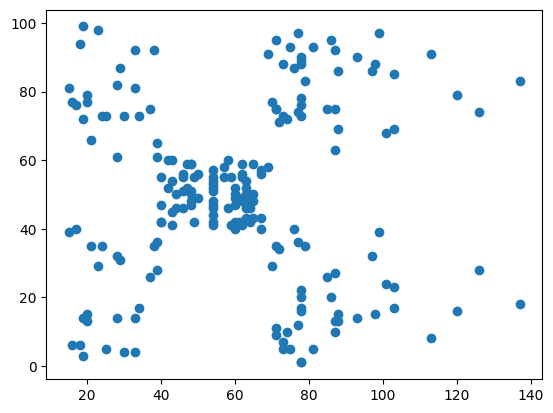

In [238]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)']) 
plt.show()

In [239]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [240]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [241]:
f_data= data.iloc[:, [2,3]].values

In [242]:
#finding best value for K
ilist=[]
n=11
for i in range(1,n):
    km=KMeans(n_clusters=i)
    km.fit_predict(f_data)
    ilist.append(km.inertia_)

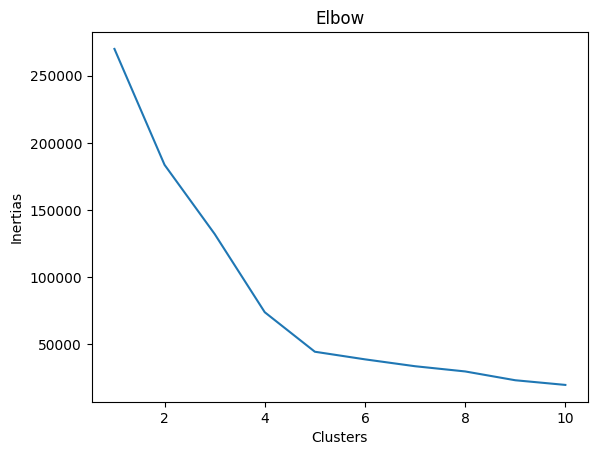

In [243]:
plt.plot(range(1,n),ilist)
plt.title("Elbow")
plt.xlabel("Clusters")
plt.ylabel('Inertias')
plt.show()

As we can see best number of clusters would be 5 

In [244]:
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(f_data)
y_pred

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [245]:
data['Cluster']=y_pred
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,4
197,Male,32,126,74,2
198,Male,32,137,18,4


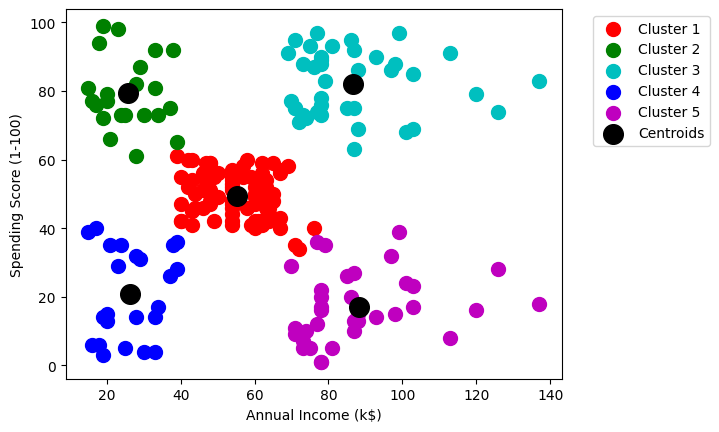

In [246]:
plt.scatter(f_data[y_pred == 0,0],f_data[y_pred == 0,1] ,label='Cluster 1',c='r',s=100)
plt.scatter(f_data[y_pred == 1,0],f_data[y_pred == 1,1] ,label='Cluster 2',c='g',s=100)
plt.scatter(f_data[y_pred == 2,0],f_data[y_pred == 2,1] ,label='Cluster 3',c='c',s=100)
plt.scatter(f_data[y_pred == 3,0],f_data[y_pred == 3,1] ,label='Cluster 4',c='b',s=100)
plt.scatter(f_data[y_pred == 4,0],f_data[y_pred == 4,1] ,label='Cluster 5',c='m',s=100)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label='Centroids',c="k",s=200)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()